In [1]:
import os
import datetime

import numpy as np
import pandas as pd

from psws_gmag import PSWS_GMAG

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

# Load in Data

In [3]:
rd = {}
rd['station']   = 'w2naf'
rd['lat']       =  41.335116
rd['lon']       = -75.600692
rd['sDatetime'] = datetime.datetime(2024,5,10)
rd['eDatetime'] = datetime.datetime(2024,5,11)
rd['resample_rate']  = datetime.timedelta(minutes=1)
rd['rolling_window'] = datetime.timedelta(minutes=15)

plot_dict = {}
# plot_dict['ylim'] = (-300,300)
plot_dict['prms'] = ['rH']
# plot_dict['prms'] = ['rH','rx','ry']

gmag        = PSWS_GMAG(**rd)

sDt_str     = rd['sDatetime'].strftime('%Y%m%d.%H%M')
eDt_str     = rd['eDatetime'].strftime('%Y%m%d.%H%M')
# data_sets   = ['resampled','raw']
# data_sets   = ['rolling','resampled']
data_sets   = ['rolling']

Loading PSWS GMAG Data: 100%|████████████████████████████████████| 1/1 [00:00<00:00, 102.07it/s]

Loading: data/psws_gmag/w2naf-20240510-runmag.log.bz2.p
Processing data using "standard" profile...

Resampling data with 1.0 minute cadence...
  Resampling Time: 0:00:00.017494


Total Processing Time: 0:00:00.017536
Applying rolling...


Total Processing Time: 0:00:00.000811


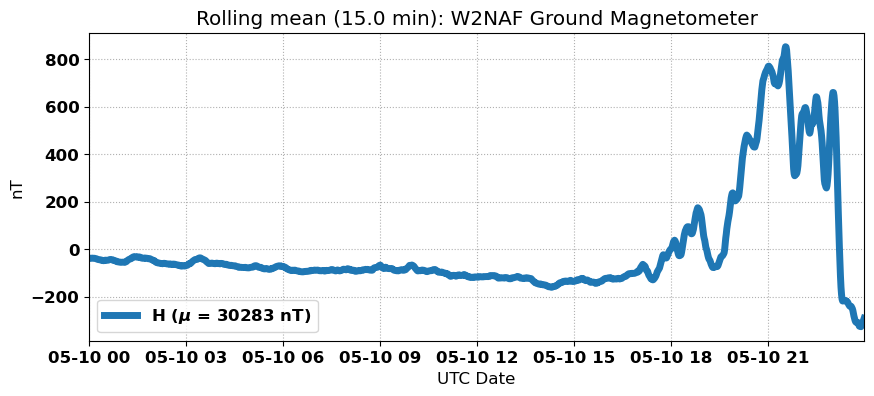

In [4]:
fig     = plt.figure(figsize=(10,4))
ax      = fig.add_subplot(1,1,1)
result  = gmag.plot_ax(ax,data_sets=data_sets,**plot_dict)
plt.show()

In [5]:
# png_fname   = '{!s}-{!s}-{!s}_gmag.png'.format(rd['station'],sDt_str,eDt_str)
# gmag.plot_figure(data_sets=data_sets,png_fpath=png_fname,**plot_dict)

# Calculate Current for Tesla Coil

In [7]:
utc  = gmag.data['rolling']['df']['UTC'].tolist()
B_nT = gmag.data['rolling']['df']['rH']

In [8]:
B_T  = B_nT * 1e-9 # Convert nT to T
B_G  = B_T  * 1e-4 # Convert T to Gauss

In [9]:
B_G

0       3.024395e-09
1       3.024398e-09
2       3.024485e-09
3       3.024461e-09
4       3.024443e-09
            ...     
1435    2.996578e-09
1436    2.997172e-09
1437    2.997881e-09
1438    2.998664e-09
1439    2.999166e-09
Name: rH, Length: 1440, dtype: float64

$$B = \mu_0 \cdot \frac{8 \cdot I \cdot N}{\sqrt{125} \cdot R}$$

$$I = \frac{1}{\mu_0} \cdot \frac{\sqrt{125} \cdot R \cdot B}{8 \cdot N}$$

In [12]:
N    = 200  # Number of Turns
R    = 0.09 # Radius of Coils in m
mu_0 = np.pi * 4e-7

I_A  = (1/mu_0) * ( (np.sqrt(125) * R * B_G) / (8 * N) )

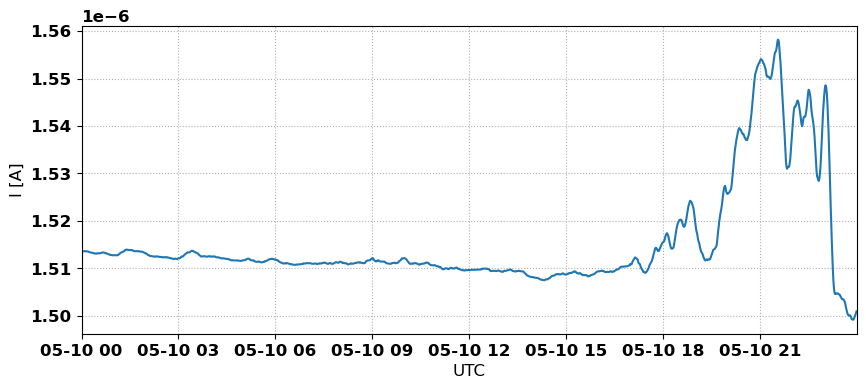

In [13]:
fig     = plt.figure(figsize=(10,4))
ax      = fig.add_subplot(1,1,1)

xx = utc
yy = I_A
ax.plot(xx,yy)
ax.set_xlabel('UTC')
ax.set_ylabel('I [A]')

plt.show()